In [2]:
import numpy as np
import h5py

# path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/run/a0050/Diagram0050_sx000sy006sz031st010_N.h5'
# path2='/capstor/scratch/cscs/fpittler/run/wilson_run/threept0050_sx00sy06sz31st010_N.h5'
# with h5py.File(path) as f1, h5py.File(path2) as f2:
#     src='sx00sy06sz31st10'
#     t1=f1[src]['N_ppa_pma'][:,16]
#     t2=f2[src]['N'][:,0]
#     dt=t1-t2
#     dt[24]*=0
#     print(t1.shape,t2.shape)
#     print(np.max(np.abs(t1)),np.max(np.abs(dt)))

In [4]:
# check flagFinish

import os

timeLimit=16
NsrcTotal=1000

path='data_aux/cfgs_all'
with open(path) as f:
    t=f.readlines()
    cfgs=[ele.strip('\n') for ele in t]
# print(len(cfgs))
for cfg in cfgs:
    # if cfg in ['a0106']:
    #     continue
    path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/run/'+cfg+'/'
    if 'flagFinish' in os.listdir(path):
        # print(cfg)
        # os.remove(path+'flagFinish')
        pass
    else:
        if True:
            files=os.listdir(path)
            with open(f'{path}src.{cfg}','r') as f:
                srcs=f.read().splitlines()
            for i,src in enumerate(srcs):
                sx,sy,sz,st=[int(s) for s in src.split(' ')]
                file='Diagram{}_sx{:03d}sy{:03d}sz{:03d}st{:03d}_N.h5'.format(cfg[1:],sx,sy,sz,st)
                if file not in files:
                    i-=1
                    break
            Ntodo=len(srcs)-i
            # print(cfg)
            print(cfg, Ntodo)
        if False:
            Nredo=Ntodo
            files=os.listdir(path)
            with open(f'{path}src.{cfg}','r') as f:
                srcs=f.read().splitlines()
            assert(len(srcs)==NsrcTotal)
            for src in srcs[-Nredo:]:
                sx,sy,sz,st=[int(s) for s in src.split(' ')]
                file='Diagram{}_sx{:03d}sy{:03d}sz{:03d}st{:03d}_N.h5'.format(cfg[1:],sx,sy,sz,st)
                file2='Diagram{}_sx{:03d}sy{:03d}sz{:03d}st{:03d}_NpiScatteringWilson.h5'.format(cfg[1:],sx,sy,sz,st)
                for f in [file,file2]:
                    if f in files:
                        os.remove(f'{path}{f}')
            
            with open(f'{path}src.{cfg}','w') as f:
                t=srcs[-Nredo:]
                t='\n'.join(t)
                f.write(t)
            with open(f'{path}run_{cfg}.sh','r') as f:
                data = f.read()
            data=data.replace('--nsrc 1000',f'--nsrc {Nredo}')
            assert(f'#SBATCH --time={timeLimit}:00:00' in data)
            timeLimit_new=(timeLimit-2)*(Nredo/NsrcTotal)+2
            data=data.replace('#SBATCH --time=16:00:00','#SBATCH --time={:02d}:00:00'.format(int(timeLimit_new)))
            with open(f'{path}run_{cfg}.sh','w') as f:
                f.write(data)
        # break
    # break

b0117 983


In [29]:
import os

path='data_aux/cfgs_all'
with open(path) as f:
    t=f.readlines()
    cfgs=[ele.strip('\n') for ele in t]
# print(len(cfgs))
for cfg in cfgs:
    path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/run/'+cfg+'/'
    files=os.listdir(path)
    files_N=[file for file in files if file.endswith('N.h5')]
    files_log=[file for file in files if file.startswith('log')]
    # print(cfg)
    for file in files_log:
        s=os.path.getsize(path+file)/1024/1024/1024
        if s>0.1:
            print(cfg,file,s)
            os.remove(path+file)
    
    # if len(files_N)==3000:
    #     assert('flagFinish' in files)
    # else:
    #     print(cfg)
        # print(cfg,len(files_N), 'flagFinish' in files)

In [ ]:
# cfgs
import os

path='/capstor/scratch/cscs/fpittler/configs/A15/run1/smeared/'
cfgs=['a'+file.split('.')[-1] for file in os.listdir(path) if file.startswith('conf_smeared.')]
path='/capstor/scratch/cscs/fpittler/configs/A15/run2/smeared/'
cfgs+=['b'+file.split('.')[-1] for file in os.listdir(path) if file.startswith('conf_smeared.')]
cfgs=list(set(cfgs)-{'b0165','b0207'}) # solver diverged
cfgs.sort()
# print(cfgs)
with open('data_aux/cfgs_all','w') as f:
    f.write('\n'.join(cfgs))

In [ ]:
# create moms
import numpy as np

Nmax=4
Nmax_sq=int(np.floor(np.sqrt(Nmax))); t_range=range(-Nmax_sq,Nmax_sq+1)
moms_N=[[x,y,z] for x in t_range for y in t_range for z in t_range if np.linalg.norm([x,y,z])**2<=Nmax]
moms_N.sort()

# for mom in moms_N:
#     print(f'0 0 0 {mom[0]} {mom[1]} {mom[2]} 0 0 0 0 0 0')

In [47]:
# create srcs
import numpy as np
import h5py,random

dims=[48,48,48,48]; Nsrc=10000

path='/capstor/store/cscs/userlab/s1174/lyan/code/glwc2/project2/03_NpiScatteringWilson/dataPrepare/A15/data_aux/cfgs_run'
with open(path,'r') as f:
    cfgs=f.read().splitlines()
    
srcs={}

path='data_aux/srcs.h5'
with h5py.File(path) as f:
    for cfg in f.keys():
        srcs[cfg]=f[cfg][:]
        
def remove_duplicates(seq):
    seen = set()
    result = []
    for item in seq:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result

for cfg in cfgs:
    print(cfg,end='             \r')
    if cfg in srcs:
        t0=[tuple([int(e) for e in ele]) for ele in srcs[cfg]]
    else:
        t0=[]

    t=t0
    while len(t)<Nsrc:
        # t=set(t0+[tuple([random.choice(range(dim)) for dim in dims]) for i in range(Nsrc*2)])
        
        t=t0+[tuple([random.choice(range(dim)) for dim in dims]) for i in range(Nsrc*2)]
        t=remove_duplicates(t)
        
        t=[list(ele) for ele in list(t)]  
        
    srcs[cfg]=t[:Nsrc]
    # print(len(srcs[cfg]),len(t[:Nsrc]))
    # break

with h5py.File(path,'w') as f:
    for cfg in srcs.keys():
        f.create_dataset(cfg,data=srcs[cfg])

[28, 1, 27, 36]   


In [60]:
# create srcs.${cfg}
import numpy as np
import h5py,os

i_start=2050; i_end=3050
print(f'Nsrc={i_end-i_start}: {i_start}-{i_end-1}')

path='/capstor/store/cscs/userlab/s1174/lyan/code/glwc2/project2/03_NpiScatteringWilson/dataPrepare/A15/data_aux/cfgs_run'
with open(path,'r') as f:
    cfgs=f.read().splitlines()
    
srcs={}
path='data_aux/srcs.h5'
with h5py.File(path) as f:
    for cfg in f.keys():
        srcs[cfg]=f[cfg][:]

pathBase='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/run/'
for cfg in cfgs:
    # if cfg!='a0050':
    #     continue
    path=f'{pathBase}{cfg}/'
    os.makedirs(path,exist_ok=True)
    with open(f'{path}src.{cfg}','w') as f:
        t=srcs[cfg][i_start:i_end]
        t='\n'.join([' '.join([str(e) for e in ele]) for ele in t])
        f.write(t)
    # break

Nsrc=1000: 2050-3049


In [ ]:
# # mv files
# import numpy as np
# import h5py,os

# # i_start=2050; i_end=3050
# # print(f'Nsrc={i_end-i_start}: {i_start}-{i_end-1}')

# path='/capstor/store/cscs/userlab/s1174/lyan/code/glwc2/project2/03_NpiScatteringWilson/dataPrepare/A15/data_aux/cfgs_run'
# with open(path,'r') as f:
#     cfgs=f.read().splitlines()
    
# srcs={}
# path='/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_aux/srcs.h5'
# with h5py.File(path) as f:
#     for cfg in f.keys():
#         srcs[cfg]=f[cfg][:]

# pathBase='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/run/'
# pathBase_new='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/run_temp/'
# for cfg in cfgs[1:]:
#     print(cfg,end='              \r')
#     path=f'{pathBase}{cfg}/'
#     path_new=f'{pathBase_new}{cfg}/'
#     os.makedirs(path_new,exist_ok=True)
#     sc=srcs[cfg][50:2050]
#     files=os.listdir(path)
#     for src in sc:
#         sx,sy,sz,st=src
#         file='Diagram{}_sx{:03d}sy{:03d}sz{:03d}st{:03d}_N.h5'.format(cfg[1:],sx,sy,sz,st)
#         file2='Diagram{}_sx{:03d}sy{:03d}sz{:03d}st{:03d}_NpiScatteringWilson.h5'.format(cfg[1:],sx,sy,sz,st)
#         if file in files:
#             os.rename(f'{path}{file}',f'{path_new}{file}')
#         else:
#             print(file)
#         if file2 in files:
#             os.rename(f'{path}{file2}',f'{path_new}{file2}')
#         else:
#             print(file2)
#         # break
#     # break

In [2]:
# produce test file
import numpy as np
import h5py,re

inpath='/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_post/a0050/'
outfile='/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_post/a0050/a0050_a3n60.h5'
with h5py.File(outfile,'w') as fw, h5py.File(f'{inpath}N.h5_0mom') as fN, \
    h5py.File(f'{inpath}P.h5_0mom') as fP, h5py.File(f'{inpath}BWZ.h5_0mom') as fBWZ:
        for f,case in zip([fN,fP,fBWZ],['N','P','BWZM']):
            for ky in f.keys():
                fw.copy(f[ky],fw,name=f'{case}/{ky}')
        
        src=list(fN['data'].keys())[0]
        (sx,sy,sz,st)=re.search('sx([0-9]*)sy([0-9]*)sz([0-9]*)st([0-9]*)',src).groups()
        (sx,sy,sz,st)=(int(sx),int(sy),int(sz),int(st))
        src_new='st{:03d}'.format(st)
        src_newM='sx{:03d}sy{:03d}sz{:03d}st{:03d}'.format(sx,sy,sz,st)
        
        imon=16
        print(fN['moms'][16])
        tN=fN[f'data/{src}/N_a'][:,16,:]
        tP=fP[f'data/{src_new}/a_a'][:,0]
        tM=tN*tP[:,None]
        fw.create_dataset(f'BWZM/data/{src_newM}/M_a',data=tM[:,None,:,None])

        tN=fN[f'data/{src}/N_ppa_pma'][:,16,:]
        tP=np.concatenate([fP[f'data/{src_new}/p+a_p+a'][:24,0],fP[f'data/{src_new}/p-a_p-a'][-24:,0]])
        tM=tN*tP[:,None]
        fw.create_dataset(f'BWZM/data/{src_newM}/M_ppa_pma',data=tM[:,None,:,None])
                

[0 0 0]


In [2]:
# xcheck Ferenc
import numpy as np
import h5py,re

topo='W'

path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/out/a0050/Diagram0050_sx000sy006sz031st010_NpiScatteringWilson.h5'
pathF=f'/capstor/scratch/cscs/fpittler/run/wilson_run/threept0050_sx00sy06sz31st010_{topo}.h5'

with h5py.File(path) as f, h5py.File(pathF) as fF:
    src='sx000sy006sz031st010'; srcF='sx00sy06sz31st10'
    # print(f[src].keys())
    # print(fF[srcF]['12/pi2=0_0_0'].keys())
    for cont in f[src].keys():
        if not (cont.startswith(topo) and cont.endswith('1')):
            continue
        t=f[src][cont][:]
        # print(f[src][cont][:].shape)
        print(cont,t[0,0,0,0])
    
    for cont in fF[srcF]['12/pi2=0_0_0'].keys():
        if not cont.startswith(topo):
            continue
        t=fF[srcF]['12/pi2=0_0_0'][cont][:]
        t=t[...,0]+1j*t[...,1]
        # print(t.shape)
        print(cont,t[0,0,0,0])



W1141_1 (-1.8891174e-06-1.3292878e-06j)
W1142_1 (-2.7969268e-06-3.047746e-07j)
W1221_1 (1.5991473e-06-1.8057236e-07j)
W1222_1 (2.0896698e-06-1.3974014e-06j)
W1321_1 (-6.9350506e-08+6.7387566e-07j)
W1322_1 (7.6079425e-07-3.368162e-07j)
W2142_1 (-3.1275126e-06+1.5339195e-07j)
W2321_1 (-2.1912956e-06+2.5410113e-06j)
W2322_1 (1.6590305e-07+5.7369704e-07j)
W1 (1.8891177e-06+1.3292885e-06j)
W2 (-2.7969265e-06-3.0477543e-07j)
W3 (-1.6590349e-07-5.7369766e-07j)
W4 (2.089669e-06-1.3974012e-06j)
W5 (-3.1275106e-06+1.5338719e-07j)
W6 (-7.607932e-07+3.3681465e-07j)
W7 (-1.5991465e-06+1.8057156e-07j)
W8 (6.935055e-08-6.7387634e-07j)
W9 (2.191294e-06-2.541011e-06j)


In [42]:
# xcheck Ferenc
import numpy as np
import h5py,re

topo='Z'

method={'B':'2','W':'1','Z':'1'}[topo]

path1='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/out/a0050/Diagram0050_sx000sy006sz031st010_NpiScatteringWilson.h5'
path1hybrid='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15_hybrid_oldQuda/out/a0050/Diagram0050_sx000sy006sz031st010_NpiScatteringWilson.h5'
path2=f'/capstor/scratch/cscs/fpittler/run/wilson_run/threept0050_sx00sy06sz31st010_{topo}.h5'

contDic={
    'B1':(-1,'B114'),'B2':(-1,'B214'),'B3':(1,'B232'),'B4':(1,'B132'),'B5':(-1,'B122'),
    'Z1':(-1,'Z222'),'Z2':(-1,'Z122'),'Z3':(1,'Z132'),'Z4':(1,'Z114'),'Z5':(-1,'Z214'),
    
    'W1':(-1,'W1141'),'W2':(+1,'W1142'),'W3':(-1,'W2322'),'W4':(+1,'W1222'),'W5':(1,'W2142'),
    'W6':(-1,'W1322'),'W7':(-1,'W1221'),'W8':(-1,'W1321'),'W9':(-1,'W2321'),
}

with h5py.File(path1) as f1, h5py.File(path1hybrid) as f1h, h5py.File(path2) as f2:
    src='sx000sy006sz031st010'; srcF='sx00sy06sz31st10'
    
    for cont in f2[srcF]['12/pi2=0_0_0'].keys():
        if not cont.startswith(topo):
            continue
        t=f2[srcF]['12/pi2=0_0_0'][cont][:]
        t=t[...,0]+1j*t[...,1]
        # print(t.shape)
        print(cont,contDic[cont])
        t2=t[:,0,0,:]
        t1=f1[src][f'{contDic[cont][1]}_{method}'][:,0,:,0]*contDic[cont][0]
        t1h=f1h[src][f'{contDic[cont][1]}_{method}'][:,0,:,0]*contDic[cont][0]
        
        dt=t1-t2
        dt[24]*=0
        
        dtP=t1+t2
        print(np.max(np.abs(t1)),np.max(np.abs(dt[:38])),np.max(np.abs(dtP[38:])))
        # for time in range(48):
        #     print(time,np.real(t1[time,0]),np.real(t2[time,0]))
        # break

Z1 (-1, 'Z222')
9.84234e-07 4.0194367e-13 9.896715e-14
Z2 (-1, 'Z122')
6.234819e-07 4.158345e-13 1.1653768e-13
Z3 (1, 'Z132')
4.9896363e-07 5.0648293e-13 1.4806762e-13
Z4 (1, 'Z114')
5.2070567e-07 5.123797e-13 1.2966188e-13
Z5 (-1, 'Z214')
1.6188193e-06 1.5050094e-12 5.165015e-13


In [15]:
# import numpy as np
# import h5py
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rcParams['lines.markersize'] = 4

# path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/out/a0050/Diagram0050_sx000sy006sz031st010_NpiScatteringWilson.h5'

# conts=['B114','B122','B132','B214','B232']
# # conts=['W1141','W1142','W1221','W1222','W1321','W1322','W2321','W2142','W2322']
# # conts=['Z114','Z122','Z132','Z214','Z222']
# Nrow,Ncol=len(conts),1
# fig, axs = plt.subplots(Nrow, Ncol, figsize=(12*Ncol,4*Nrow), squeeze=False, sharex=True, sharey=True)
# colors=['r','g','b','purple']
# with h5py.File(path) as f:
#     for irow, cont in enumerate(conts):
#         ax=axs[irow,0]
#         methods={
#             'B':['1','2','4'],
#             'W':['1','2','3'],
#             'Z':['1','2']
#         }[cont[0]]
#         for i,method in enumerate(methods):
#             ab=0
#             t=np.real(f['sx000sy006sz031st010'][f'{cont}_{method}'][:,0,ab])
#             plt_y=t[:,0] if len(t.shape)==2 else t[:,0,0]
#             ax.scatter(np.arange(len(plt_y))-0.1,plt_y,color=colors[i])
            
#             plt_y=np.mean(t,axis=1) if len(t.shape)==2 else np.mean(np.mean(t,axis=1),axis=1)
#             ax.scatter(np.arange(len(plt_y))+0.1,plt_y,color=colors[i],facecolor='white')
# ax.set_yscale('log')


In [20]:
import numpy as np
import h5py,os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['errorbar.capsize'] = 6
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 12
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

def jackknife(dat,d:int=0,nmin:int=6000):
    n=len(dat)
    if d==0:
        d=n//nmin
    d=max(d,1)
    
    if d!=1:
        def tfunc(dat):
            shape=dat.shape
            nLeft=(shape[0]//d)*d
            shape_new=(shape[0]//d,d)+shape[1:]
            return dat[:nLeft].reshape(shape_new).mean(axis=1)
        dat_run=tfunc(dat)
    else:
        dat_run=dat
    n=len(dat_run)
    return np.array([np.mean(np.delete(dat_run,i,axis=0),axis=0) for i in range(n)])
def jackme(dat_jk):
    n=len(dat_jk)
    dat_mean=np.mean(dat_jk,axis=0)
    dat_err=np.sqrt(np.var(dat_jk,axis=0,ddof=0)*(n-1))
    return (dat_mean,dat_err)

path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/out/a0050/Diagram0050_sx000sy006sz031st010_NpiScatteringWilson.h5'
path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/out/a0001/'
files=[file for file in os.listdir(path) if file.endswith('NpiScatteringWilson.h5')]
assert(len(files)==50)

data={}
for file in files:
    with h5py.File(f'{path}{file}') as f:
        src=list(f['data'].keys())[0]
        for ky in f[f'data/{src}'].keys():
            if ky not in data:
                data[ky]=[]
            data[ky].append(f[f'data/{src}/{ky}'][:])
for ky in data.keys():
    data[ky]=np.array(data[ky])

contss=[
    ['B114','B122','B132','B214','B232'],
    ['W1141','W1142','W1221','W1222','W1321','W1322','W2321','W2142','W2322'],
    ['Z114','Z122','Z132','Z214','Z222']
]

Nstoc=12

Nrow,Ncol=3,9
fig, axs = plt.subplots(Nrow, Ncol, figsize=(6*Ncol,4*Nrow), squeeze=False, sharex=True)
colors=['r','g','b','purple']
tmin=1; tmax=8
for iconts,conts in enumerate(contss):
    topo=conts[0][0]
    methods={
        'B':['1','2','4'],
        'W':['1','2','3'],
        # 'B':['2','4'],
        # 'W':['2','3'],
        'Z':['1','2']
    }[topo]
    # ax=axs[iconts,0]
    # ax.title.set_text(f'{topo}')
    # ax.set_ylim([-4e-6,4e-6])
    # ax.axhline(0,ls='--',color='grey')
    # for i,method in enumerate(methods):
    #     t=np.sum([np.real(f['sx000sy006sz031st010'][f'{cont}_{method}'][:,0,ab]) for cont in conts],axis=0)
    #     if True:
    #         if len(t.shape)==2:
    #             tjk=jackknife(t.T)[:,:tmax]
    #             mean,err=jackme(tjk)
    #             plt_y=mean; plt_err=err
    #             ax.errorbar(np.arange(len(plt_y)),plt_y,plt_err,color=colors[i],label=method)
            
    #     if len(t.shape)==3:
    #         tjk=jackknife(np.mean(t,axis=2).T)[:,:tmax]
    #         mean,err=jackme(tjk)
    #         plt_y=mean; plt_err=err
    #         ax.errorbar(np.arange(len(plt_y))-0.1,plt_y,plt_err,color=colors[i],label=method+'; err=i')
            
    #         tjk=jackknife(np.mean(t,axis=1).T)[:,:tmax]
    #         mean,err=jackme(tjk)
    #         plt_y=mean; plt_err=err
    #         ax.errorbar(np.arange(len(plt_y))+0.1,plt_y,plt_err,color=colors[i],mfc='white',label=method+'; err=j')
    # ax.legend()
        
    for icont, cont in enumerate(conts):
        ax=axs[iconts,icont]
        ax.title.set_text(f'{cont}')
        for i,method in enumerate(methods):
            ab=0
            t=np.mean(np.real(data[f'{cont}_{method}']),axis=0)[:,0,ab]
            t=t[:,:Nstoc] if len(t.shape)==2 else t[:,:Nstoc,:Nstoc]
            
            if False:
                plt_y=t[:,0] if len(t.shape)==2 else t[:,0,0]
                ax.scatter(np.arange(len(plt_y))-0.1,plt_y,color=colors[i])
                plt_y=np.mean(t,axis=1) if len(t.shape)==2 else np.mean(np.mean(t,axis=1),axis=1)
                ax.scatter(np.arange(len(plt_y))+0.1,plt_y,color=colors[i],facecolor='white')
                
            if True:
                if len(t.shape)==2:
                    tjk=jackknife(t.T)[:,tmin:tmax]
                    mean,err=jackme(tjk)
                    plt_y=mean; plt_err=err
                    ax.errorbar(np.arange(tmin,tmax),plt_y,plt_err,color=colors[i],label=method)
                
            if len(t.shape)==3:
                tjk=jackknife(np.mean(t,axis=2).T)[:,tmin:tmax]
                mean,err=jackme(tjk)
                plt_y=mean; plt_err=err
                ax.errorbar(np.arange(tmin,tmax)-0.1,plt_y,plt_err,color=colors[i],label=method+'; err=i')
                
                tjk=jackknife(np.mean(t,axis=1).T)[:,tmin:tmax]
                mean,err=jackme(tjk)
                plt_y=mean; plt_err=err
                ax.errorbar(np.arange(tmin,tmax)+0.1,plt_y,plt_err,color=colors[i],mfc='white',label=method+'; err=j')
                
                # tjk=jackknife(t[:,:,0].T)[:,tmin:tmax]
                # mean,err=jackme(tjk)
                # plt_y=mean; plt_err=err
                # ax.errorbar(np.arange(tmin,tmax)-0.1,plt_y,plt_err,color=colors[i],label=method+'; err=i')
                
                # tjk=jackknife(t[:,0,:].T)[:,tmin:tmax]
                # mean,err=jackme(tjk)
                # plt_y=mean; plt_err=err
                # ax.errorbar(np.arange(tmin,tmax)+0.1,plt_y,plt_err,color=colors[i],mfc='white',label=method+'; err=j')
                
                tjk=jackknife(t[:,range(Nstoc),range(Nstoc)].T)[:,tmin:tmax]
                mean,err=jackme(tjk)
                plt_y=mean; plt_err=err
                ax.errorbar(np.arange(tmin,tmax),plt_y,plt_err,color=colors[i],mfc='orange',label=method+'; err=j')
                
        ax.legend()
                    
plt.tight_layout()
plt.savefig("fig/stocMethodComparison.pdf")
plt.close()

# below for hybrid

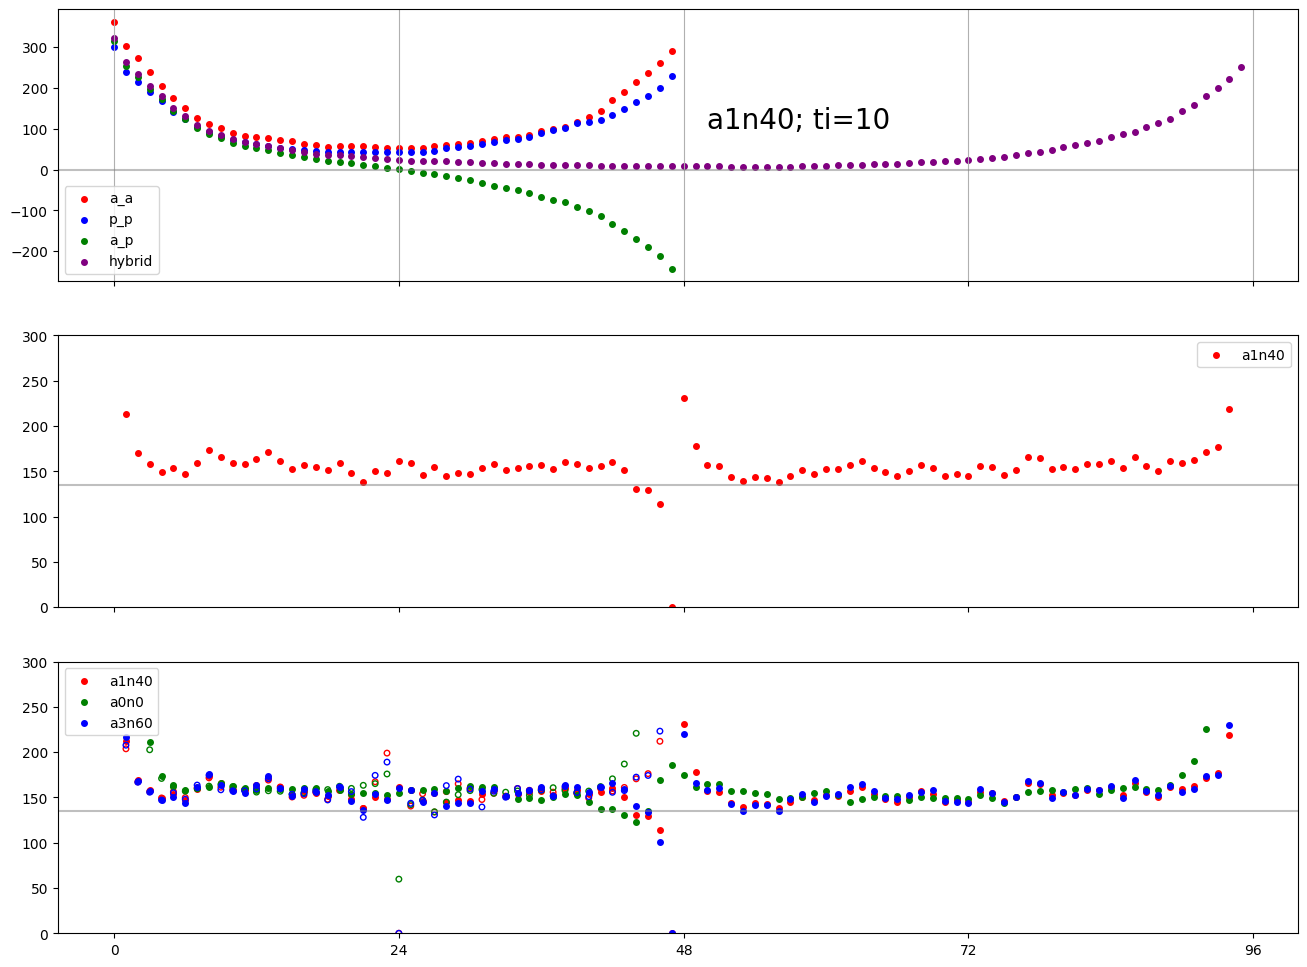

In [22]:
# P
import numpy as np
import h5py, warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import leastsq, curve_fit, fsolve
mpl.rcParams['lines.markersize'] = 4
fig, axs = plt.subplots(3, 1, figsize=(16,4*3), squeeze=False, sharex=True)
ax=axs[0,0]

a=0.1163
hbarc = 1/197.3
aInv=1/(a*hbarc)

smears=['a1n40','a0n0','a3n60']
smear=smears[0]

ti=10
path=f'/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_test/a0050_{smear}.h5'
with h5py.File(path) as f:
    srcs=list(f['P/data'].keys()); srcs.sort()
    kys=['a_a','p_p','a_p','p_a','p+a_p+a','p-a_p-a']
    data={ky:np.array([f[f'P/data/{src}/{ky}'] for src in srcs]) for ky in kys}
    data={ky:data[ky][:,:,0] for ky in data.keys()}
    data={ky:np.mean(np.real(data[ky])[ti:ti+1],axis=0) for ky in data.keys()}

colorDic={'a_a':'r','p_p':'b','a_p':'g','p_a':'g'}

times=np.arange(48)
for ky in ['a_a','p_p','a_p']:
    ax.scatter(times,data[ky],color=colorDic[ky],label=ky)
times=np.arange(96)
ax.scatter(times,np.concatenate([data['p+a_p+a'],data['p-a_p-a']])/4,color='purple',label='hybrid')
ax.set_xticks(np.arange(0,96+1,24))
ax.grid(axis='x')
ax.axhline(0,color='grey',alpha=0.5)
# ax.set_ylim([-100,100])
# ax.set_yscale('symlog')
ax.legend()
ax.text(50,100,f'{smear}; ti={ti}',size=20)
None

def fsolve2(func,x0):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        res=fsolve(func, x0)[0]
    return res if res!=x0 else np.NaN

tau=1
def C2pt2meff(C2pt,totalT):
    tfunc_C=lambda m,t:np.exp(-m*t)+np.exp(-m*(totalT-t))
    t=C2pt # dim=time
    t=(np.roll(t,-tau,axis=0))/(t)
    t=np.array([fsolve2(lambda m:((tfunc_C(m,xt+tau))/(tfunc_C(m,xt)))-ele, 0.0593) for xt,ele in enumerate(t)])
    return t

ax=axs[1,0]
ax.set_ylim([0,300])
ax.axhline(135,color='grey',alpha=0.5)
for smear,color in zip(smears,['r','g','b']):
    path=f'/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_test/a0050_{smear}.h5'
    with h5py.File(path) as f:
        srcs=list(f['P/data'].keys()); srcs.sort()
        kys=['a_a','p_p','a_p','p_a','p+a_p+a','p-a_p-a']
        data={ky:np.array([f[f'P/data/{src}/{ky}'] for src in srcs]) for ky in kys}
        data={ky:data[ky][:,:,0] for ky in data.keys()}
        data={ky:np.mean(np.real(data[ky])[:],axis=0) for ky in data.keys()}
        
    # times=np.arange(48)
    # meff=C2pt2meff(data['a_a'],48)*aInv
    # ax.scatter(times,meff,color=color,facecolor='none')
    
    times=np.arange(96)
    meff=C2pt2meff(np.concatenate([data['p+a_p+a'],data['p-a_p-a']]),96)*aInv
    ax.scatter(times,meff,color=color,label=smear)
    break
ax.legend()


ax=axs[2,0]
ax.set_ylim([0,300])
ax.axhline(135,color='grey',alpha=0.5)
for smear,color in zip(smears,['r','g','b']):
    path=f'/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_test/a0050_{smear}.h5'
    with h5py.File(path) as f:
        srcs=list(f['P/data'].keys()); srcs.sort()
        kys=['a_a','p_p','a_p','p_a','p+a_p+a','p-a_p-a']
        data={ky:np.array([f[f'P/data/{src}/{ky}'] for src in srcs]) for ky in kys}
        data={ky:data[ky][:,:,0] for ky in data.keys()}
        data={ky:np.mean(np.real(data[ky])[:],axis=0) for ky in data.keys()}
        
    times=np.arange(48)
    meff=C2pt2meff(data['a_a'],48)*aInv
    ax.scatter(times,meff,color=color,facecolor='none')
    
    times=np.arange(96)
    meff=C2pt2meff(np.concatenate([data['p+a_p+a'],data['p-a_p-a']]),96)*aInv
    ax.scatter(times,meff,color=color,label=smear)
ax.legend()


    

/tmp/ipykernel_20322/3640205877.py:66: RuntimeWarning: invalid value encountered in log
  t=np.log(t/np.roll(t,-1,axis=0)) * aInv


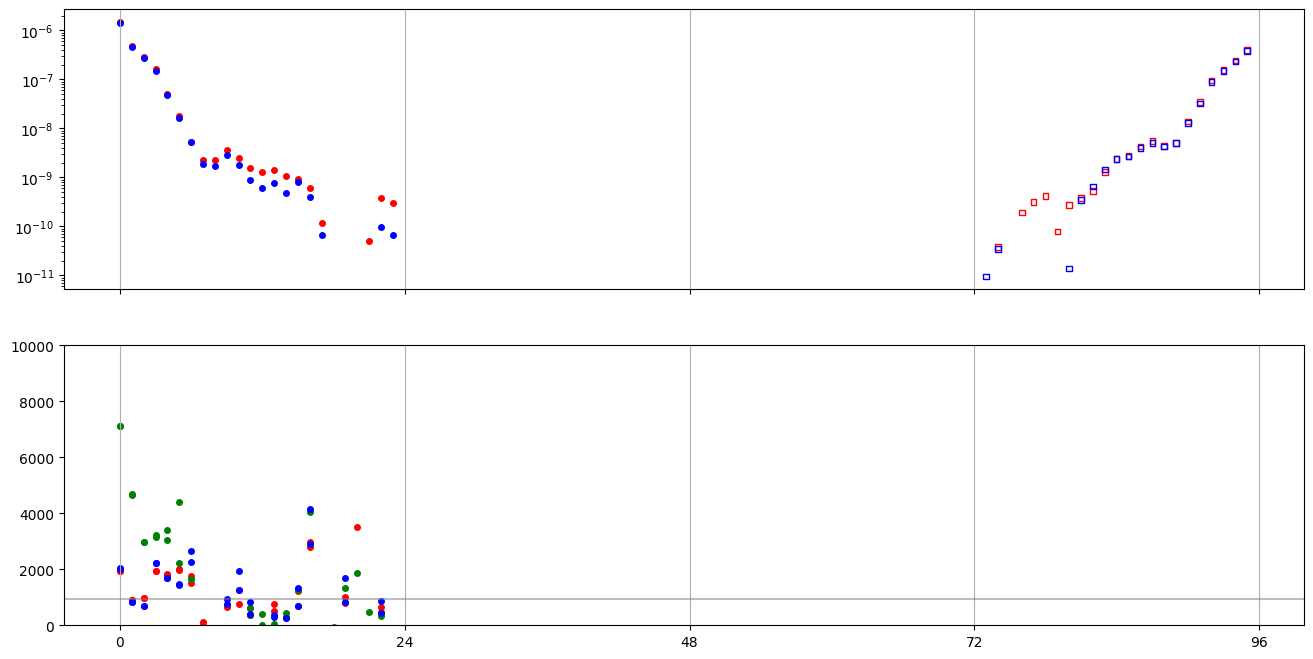

In [1]:
# M
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 4
fig, axs = plt.subplots(2, 1, figsize=(16,4*2), squeeze=False, sharex=True)

a=0.1163
hbarc = 1/197.3
aInv=1/(a*hbarc)

smears=['a1n40','a0n0','a3n60']
smear=smears[0]

colorDic={'N_a':'r','N_ppa_pma':'b'}

ax=axs[0,0]
path=f'/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_test/a0050_{smear}.h5'
with h5py.File(path) as f:
    src='sx00sy06sz31st10'
    imom=16
    # print(f['N']['moms'][imom])
    for i,ky in enumerate(['N_a','N_ppa_pma']):
        t=f['N/data'][src][ky][:,imom]
        dat=t
        if ky=='N_ppa_pma':
            dat/=8
        
        show=24
        t=np.real(dat)[:show,0]+np.real(dat)[:show,5]
        times=np.arange(96)[:show]
        ax.scatter(times,t,color=colorDic[ky])
        t=np.real(dat)[-show:,0] + np.real(dat)[-show:,5]
        times=np.arange(96)[-show:]
        # ax.scatter(times,-t,color=colorDic[ky])
        
        
        t=np.real(dat)[-show:,10] + np.real(dat)[-show:,15]
        times=np.arange(96)[-show:]
        ax.scatter(times,t,color=colorDic[ky],marker='s',facecolors='None')
        # ax.scatter(np.flip(96-times),np.flip(t),color=colorDic[ky],marker='s',facecolors='None')
        t=np.real(dat)[:show,10]+np.real(dat)[:show,15]
        times=np.arange(96)[:show]
        # ax.scatter(times,-t,color=colorDic[ky],marker='s',facecolors='None')
        
ax.set_yscale('log')
ax.set_xticks(np.arange(0,96+1,24))
ax.grid(axis='x')

ax=axs[1,0]
for smear,color in zip(smears,['r','g','b']):
    path=f'/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_test/a0050_{smear}.h5'
    with h5py.File(path) as f:
        src='sx00sy06sz31st10'
        imom=16
        # print(f['N']['moms'][imom])
        for i,ky in enumerate(['N_a','N_ppa_pma']):
            t=f['N/data'][src][ky][:,imom]
            dat=t
            if ky=='N_ppa_pma':
                dat/=8
            
            show=24
            t=np.real(dat)[:show,0]+np.real(dat)[:show,5]
            t=np.log(t/np.roll(t,-1,axis=0)) * aInv
            times=np.arange(96)[:show]
            ax.scatter(times,t,color=color)
            
ax.set_ylim([0,10000])
ax.axhline(938,color='grey',alpha=0.5)
ax.grid(axis='x')

/tmp/ipykernel_20322/1845384524.py:66: RuntimeWarning: invalid value encountered in log
  t=np.log(t/np.roll(t,-1,axis=0)) * aInv


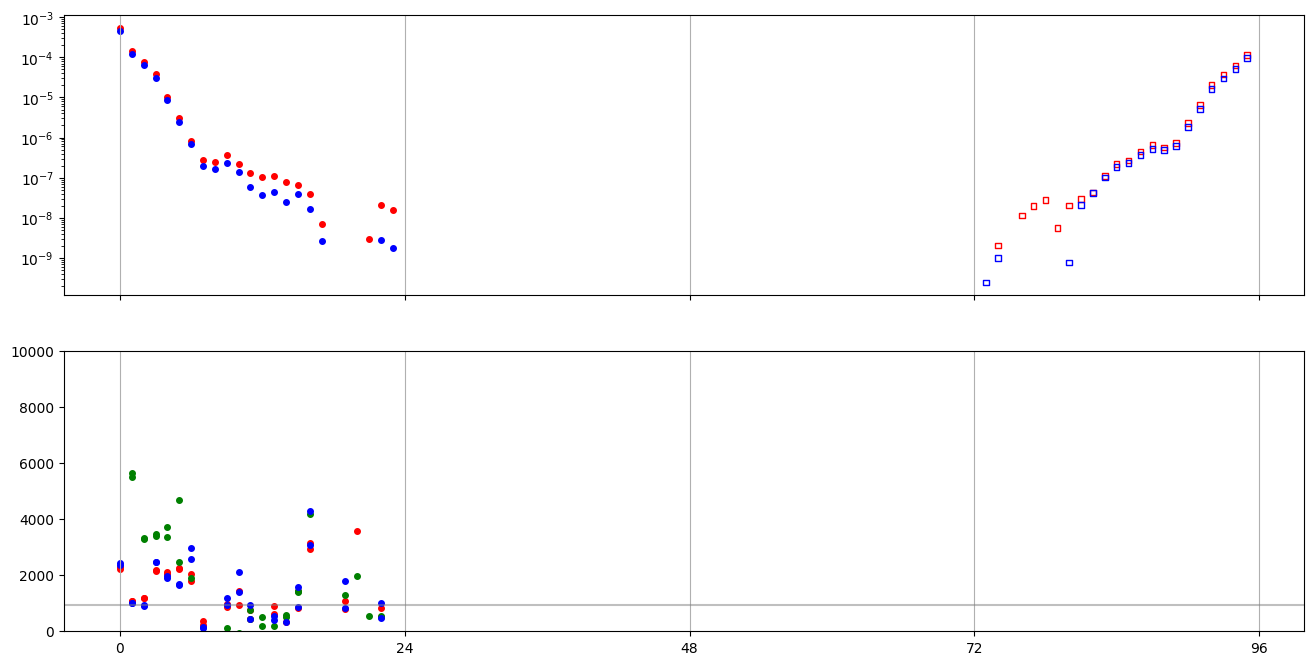

In [7]:
# N
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 4
fig, axs = plt.subplots(2, 1, figsize=(16,4*2), squeeze=False, sharex=True)

a=0.1163
hbarc = 1/197.3
aInv=1/(a*hbarc)

smears=['a1n40','a0n0','a3n60']
smear=smears[0]

colorDic={'M_a':'r','M_ppa_pma':'b'}

ax=axs[0,0]
path=f'/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_test/a0050_{smear}.h5'
with h5py.File(path) as f:
    src='sx000sy006sz031st010'
    imom=16
    # print(f['N']['moms'][imom])
    for i,ky in enumerate(['M_a','M_ppa_pma']):
        t=f['BWZM/data'][src][ky][:,0,:,0]
        dat=t
        if ky=='M_ppa_pma':
            dat=dat/8/4
        
        show=24
        t=np.real(dat)[:show,0]+np.real(dat)[:show,5]
        times=np.arange(96)[:show]
        ax.scatter(times,t,color=colorDic[ky])
        t=np.real(dat)[-show:,0] + np.real(dat)[-show:,5]
        times=np.arange(96)[-show:]
        # ax.scatter(times,-t,color=colorDic[ky])
        
        
        t=np.real(dat)[-show:,10] + np.real(dat)[-show:,15]
        times=np.arange(96)[-show:]
        ax.scatter(times,t,color=colorDic[ky],marker='s',facecolors='None')
        # ax.scatter(np.flip(96-times),np.flip(t),color=colorDic[ky],marker='s',facecolors='None')
        t=np.real(dat)[:show,10]+np.real(dat)[:show,15]
        times=np.arange(96)[:show]
        # ax.scatter(times,-t,color=colorDic[ky],marker='s',facecolors='None')
        
ax.set_yscale('log')
ax.set_xticks(np.arange(0,96+1,24))
ax.grid(axis='x')

ax=axs[1,0]
for smear,color in zip(smears,['r','g','b']):
    path=f'/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_test/a0050_{smear}.h5'
    with h5py.File(path) as f:
        src='sx000sy006sz031st010'
        imom=16
        # print(f['N']['moms'][imom])
        for i,ky in enumerate(['M_a','M_ppa_pma']):
            t=f['BWZM/data'][src][ky][:,0,:,0]
            dat=t
            if ky=='M_ppa_pma':
                dat=dat/8/4
                
            show=24
            t=np.real(dat)[:show,0]+np.real(dat)[:show,5]
            t=np.log(t/np.roll(t,-1,axis=0)) * aInv
            times=np.arange(96)[:show]
            ax.scatter(times,t,color=color)
            
ax.set_ylim([0,10000])
ax.axhline(938,color='grey',alpha=0.5)
ax.grid(axis='x')

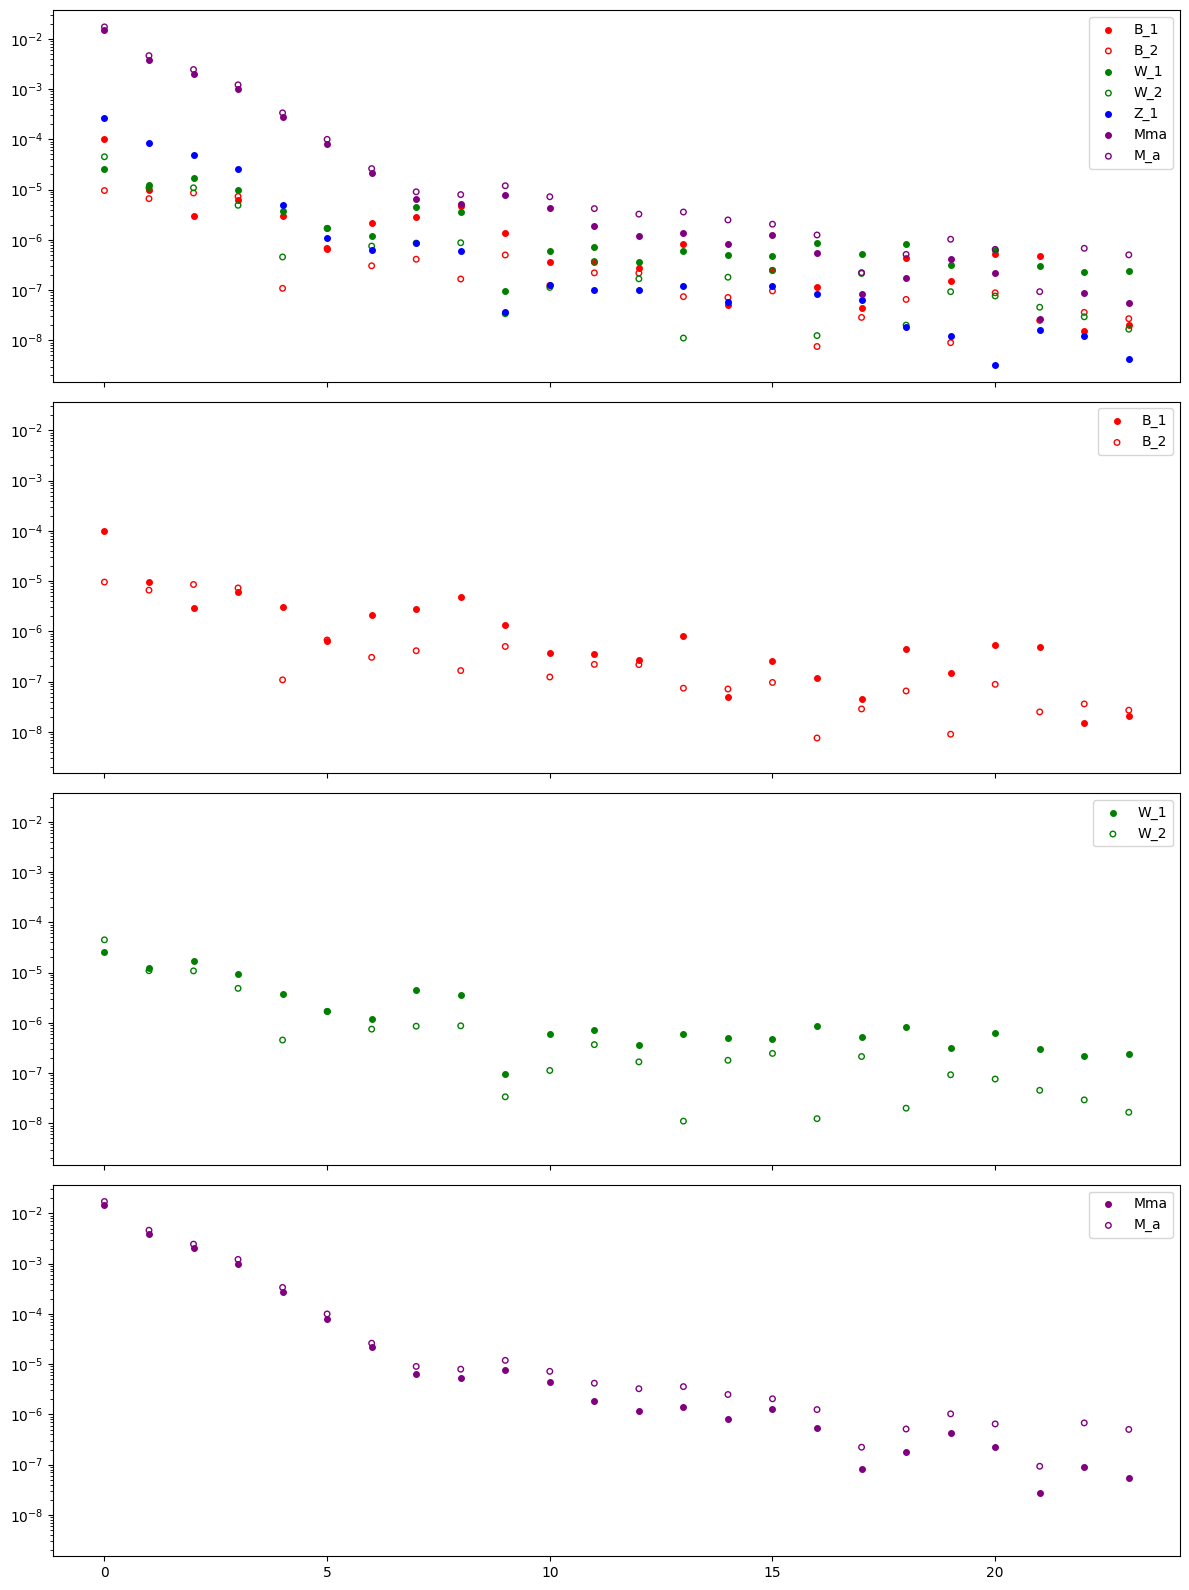

In [35]:
# BWZM
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 4

smears=['a1n40','a0n0','a3n60']
smear=smears[0]

toposs=[
    ['B_1','B_2','W_1','W_2','Z_1','Mma','M_a'],
    ['B_1','B_2'],
    ['W_1','W_2'],
    ['Mma','M_a'],
]
Nrow=len(toposs)
fig, axs = plt.subplots(Nrow, 1, figsize=(12,4*Nrow), squeeze=False, sharex=True, sharey=True)

colors=['r','g','b','purple']
colorDic={'B':'r','W':'g','Z':'b','M':'purple'}

path=f'/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_test/a0050_{smear}.h5'
with h5py.File(path) as f:
    src='sx000sy006sz031st010'
    kys=list(f['BWZM/data'][src].keys())
    
    for irow,topos in enumerate(toposs):
        ax=axs[irow,0]
        for i,topo in enumerate(topos):
            conts=[ky for ky in kys if ky.startswith(topo[0]) and ky.endswith(topo[-2:])]
            # print(topo,conts)
        
            t=np.array([f['BWZM/data'][src][cont][:,0,:,:] for cont in conts])
            if topo=='M_a':
                t*=(8*4)
            t=t[...,:]
            t=np.mean(t,axis=-1)
            t=np.sum(t,axis=0)
            t=t[:,0]+t[:,5]
            t=np.abs(np.real(t))
            ax.scatter(range(24),t[:24],color=colorDic[topo[0]],facecolors='None' if topo[-2:]=='_2' or topo[-2:]=='_a' else None,label=topo)
            
        ax.set_yscale('log')
        ax.legend()

plt.tight_layout()
None


In [ ]:
# check B2=B3

import h5py
import numpy as np

path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/run/a0050/Diagram0050_sx000sy006sz031st010_NpiScatteringWilson.h5'
with h5py.File(path) as f:
    print(f.keys())
    
    ky1='sx00sy00sz00st10/V3B2/pi2=0_0_0/i_stoc=0'
    ky2='sx00sy00sz00st10/V3B3/i_stoc=0'
    
    t1=f[ky1][:,0,0,:,:,:]
    t2=f[ky2][:,0,0,:,:,:]
    dt=t1-t2
    print(np.max(np.abs(t1)))
    print(np.max(np.abs(dt)))
    # print(t1[:,0,0,0])
    # print(t2[:,0,0,0])
    # print(dt[:,0,0,0])
    # print(dt[0])

3.0 60 | rms= 0.603387509101874
1.0 40 0.4774805256203304
3.0 40 0.5012719666396496


(-0.1, 1.5)

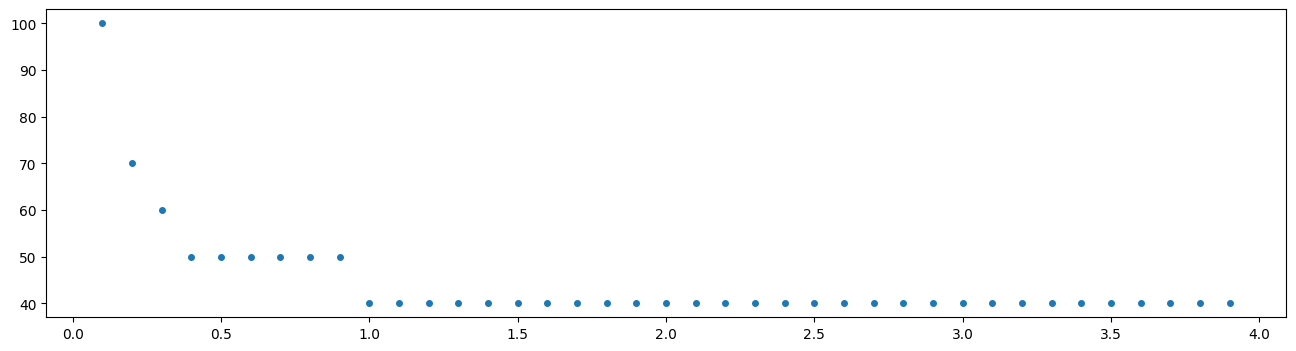

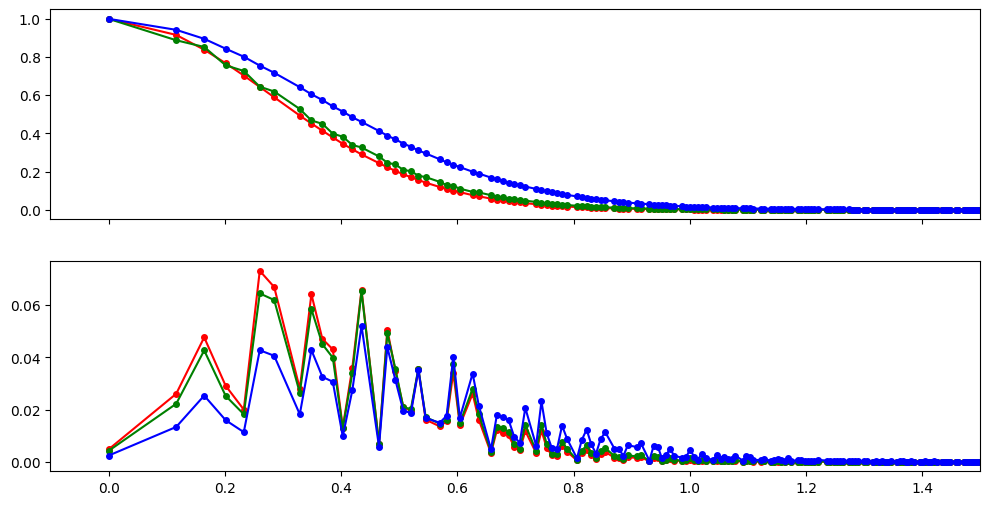

In [4]:

# smearing 
import os
import numpy as np
np.set_printoptions(legacy='1.25')
from math import floor, log10
def un2str(x, xe, precision=2):
    """pretty print nominal value and uncertainty

    x  - nominal value
    xe - uncertainty
    precision - number of significant digits in uncertainty

    returns shortest string representation of `x +- xe` either as
        x.xx(ee)e+xx
    or as
        xxx.xx(ee)"""
    # base 10 exponents
    x_exp = int(floor(log10(np.abs(x))))
    xe_exp = int(floor(log10(xe)))

    # uncertainty
    un_exp = xe_exp-precision+1
    un_int = round(xe*10**(-un_exp))

    # nominal value
    no_exp = un_exp
    no_int = round(x*10**(-no_exp))

    # format - nom(unc)exp
    fieldw = x_exp - no_exp
    fmt = '%%.%df' % fieldw
    result1 = (fmt + '(%.0f)e%d') % (no_int*10**(-fieldw), un_int, x_exp)

    # format - nom(unc)
    fieldw = max(0, -no_exp)
    fmt = '%%.%df' % fieldw
    result2 = (fmt + '(%.0f)') % (no_int*10**no_exp, un_int*10**max(0, un_exp))
    if un_exp<0 and un_int*10**un_exp>=1:
        fmt2= '(%%.%df)' % (-un_exp)
        result2 = (fmt + fmt2) % (no_int*10**no_exp, un_int*10**un_exp)

    # return shortest representation
    if len(result2) <= len(result1):
        return result2
    else:
        return result1

path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/quark_rms/cB211.072.64/run/a1000/'
nAPE=50; aAPE=0.5
a=0.07957; a_err=0.00013
alphas=[0.2,1.0]

path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/quark_rms/A15/run/a0050/'
nAPE=25; aAPE=0.4
a=0.1163; a_err=0.0004
alphas=[1.0,3.0]

rms_expected=0.5

def num2str(num):
    res=str(num).replace('.','p')[:3]
    if len(res)==3 and res[-1]=='0':
        res=res[:2]
    return res
def get(aGau,nGau):
    file=f'output_nAPE{nAPE}_aAPE{num2str(aAPE)}_nGau{nGau}_aGau{num2str(aGau)}'
    with open(f'{path}{file}','r') as f:
        t=f.read().splitlines()
        t=[row.split('\t') for row in t]
        t=[[int(e0),int(e1),float(e2)] for e0,e1,e2 in t]
    r2s,counts,phi2s=np.transpose(t)
    return r2s,counts,phi2s

aGaus=[round(ele,1) for ele in np.arange(0.1,4.,0.1)]
nGaus=range(10,200+1,10)
nGaus_opt=[]
rmss_opt=[]
for aGau in aGaus:
    rmss=[]
    for nGau in nGaus:
        r2s,counts,phi2s=get(aGau,nGau)
        rms=np.sqrt(np.sum(r2s*phi2s)/np.sum(phi2s))*a
        rmss.append(rms)
        
        if aGau==3.0 and nGau==60:
            print(aGau,nGau,'| rms=',rms)
            
    drmss=np.abs(np.array(rmss)-rms_expected)
    ind=np.argmin(drmss)
    nGaus_opt.append(nGaus[ind] if drmss[ind]<0.1 else None)
    rmss_opt.append(rmss[ind])

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 4
fig, axs = plt.subplots(1, 1, figsize=(16,4), squeeze=False, sharex=True, sharey=True)
ax=axs[0,0]
ax.scatter(aGaus,nGaus_opt)
for alpha in alphas:
    ind=aGaus.index(alpha); print(aGaus[ind],nGaus_opt[ind],rmss_opt[ind])

colors=['r','g','b','purple']
fig, axs = plt.subplots(2, 1, figsize=(12,6), squeeze=False, sharex=True)
ax=axs[0,0]; ax1=axs[1,0]
for i,alpha in enumerate(alphas):
    ind=aGaus.index(alpha)
    r2s,counts,phi2s=get(aGaus[ind],nGaus_opt[ind])
    x=np.sqrt(r2s)*a; y=phi2s/counts/phi2s[0] 
    ax.plot(x,y,color=colors[i],marker='o')
    x=np.sqrt(r2s)*a; y=phi2s/np.sum(phi2s)
    ax1.plot(x,y,color=colors[i],marker='o')

i=2 
r2s,counts,phi2s=get(3.0,60)
x=np.sqrt(r2s)*a; y=phi2s/counts/phi2s[0] 
ax.plot(x,y,color=colors[i],marker='o')
x=np.sqrt(r2s)*a; y=phi2s/np.sum(phi2s)
ax1.plot(x,y,color=colors[i],marker='o')
    
# r2s,counts,phi2s=get(0.2,125)
# x=np.sqrt(r2s)*a; y=phi2s/np.sum(phi2s)/counts
# ax.scatter(x,y,color=colors[2])

ax.set_xlim([-0.1,1.5])